# Imports

In [37]:
import os
import pandas as pd
import numpy as np

from orbit_generation.visualize import visualize_static_orbits, plot_mean_distance_by_group_column
from orbit_generation.experiment import read_json_to_dataframe, plot_corr_matrix, create_experiment_image_grid

In [38]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [39]:
experiments_folder = r'../experiments'
experiments_file = r'../experiments/experiments.json'
results_folder = r'../experiments/results'
generated_orbits_path = os.path.join(results_folder, 'generated_orbits')
refined_orbits_path = os.path.join(results_folder, 'refined_orbits')
latent_space_with_distributions_path = os.path.join(results_folder, 'latent_space_label_distribution')
metrics_corr_matrix_path = os.path.join(results_folder, 'metrics_corr_matrix')

# Experiment Metrics

In [40]:
df=read_json_to_dataframe(experiments_file)
df.shape

(35, 28)

In [41]:
# Check for columns with NaN values
nan_columns = df.isna().sum()
num_nan_columns = (nan_columns > 0).sum()

# print(nan_columns[nan_columns > 0])

# Drop columns with NaN values
df = df.dropna(axis=0)
df.shape

(28, 28)

In [42]:
# Add the parameters as columns
parameters_df = df['parameters'].apply(pd.Series)
df = pd.concat([df, parameters_df], axis=1)
df = df.drop(columns=['parameters'])

# Extract only the 'beta' parameter from model_kwargs
beta_values = df['model_kwargs'].apply(lambda x: x.get('beta'))
df['beta'] = beta_values
df = df.drop(columns=['model_kwargs'])

In [43]:
static_parameters = ['id_experiment', 'seq_len','feature_dim', 'val_split', 'batch_size', 'lr', 'epochs', 'input_seq_len_convergence', 'samples_to_generate', 'max_iter_convergence']
repeated_metrics = ['family_ari', 'family_nmi', 'family_homogeneity', 'family_completeness', 'family_fmi', 'family_purity', 'family_silhouette_score', 'family_jaccard', 'inversions', 'kendall_tau_distance']
df = df.drop(columns=static_parameters + repeated_metrics)
df.head()

id discarded_family_ids discarded_families  val_total_loss  \
0   1                   []                 []        2.022445   
1   2                   []                 []        3.682778   
2   3                   []                 []        5.691706   
3   4                   []                 []        7.802168   
4   5                   []                 []        4.286800   

   val_reconstruction_loss  val_kl_loss  train_total_loss  \
0                 0.903935     1.118510          2.233856   
1                 1.551744     2.131035          3.878370   
2                 2.088912     3.602796          5.971081   
3                 3.375228     4.426939          8.334735   
4                 4.266716     0.020084          1.313116   

   train_reconstruction_loss  train_kl_loss  family_v-measure  \
0                   1.114132       1.119726          0.812878   
1                   1.736799       2.141573          0.758778   
2                   2.375850       3.595230          0.727170   
3                   3.677602       4.657131          0.679428   
4                   1.276163       0.036952          0.705354   

   family_accuracy  position_error  velocity_error  energy_error  \
0         0.676561        0.254864        0.426664      1.311549   
1         0.568158        0.297370        0.475747      1.270890   
2         0.516224        0.237039        0.417413      0.951022   
3         0.460596        0.221820        0.414658      0.967546   
4         0.438898        0.335772        0.535105      0.942323   

   disorder_metric  correct_order      data_used  families_to_discard  \
0       322.500000      72.186667  EM_N_fix_1500                    0   
1       291.833333      72.710000  EM_N_fix_1500                    0   
2       257.673333      73.090000  EM_N_fix_1500                    0   
3       278.446667      70.570000  EM_N_fix_1500                    0   
4       342.493333      73.076667  EM_N_fix_1500                    0   

        model_name  latent_dim distance_metric   beta  
0  vae_conv5_legit           2       euclidean  0.200  
1  vae_conv5_legit           2       euclidean  0.500  
2  vae_conv5_legit           2       euclidean  1.000  
3  vae_conv5_legit           2       euclidean  1.500  
4  vae_conv5_legit           2       euclidean  0.001

## Feature Correlation

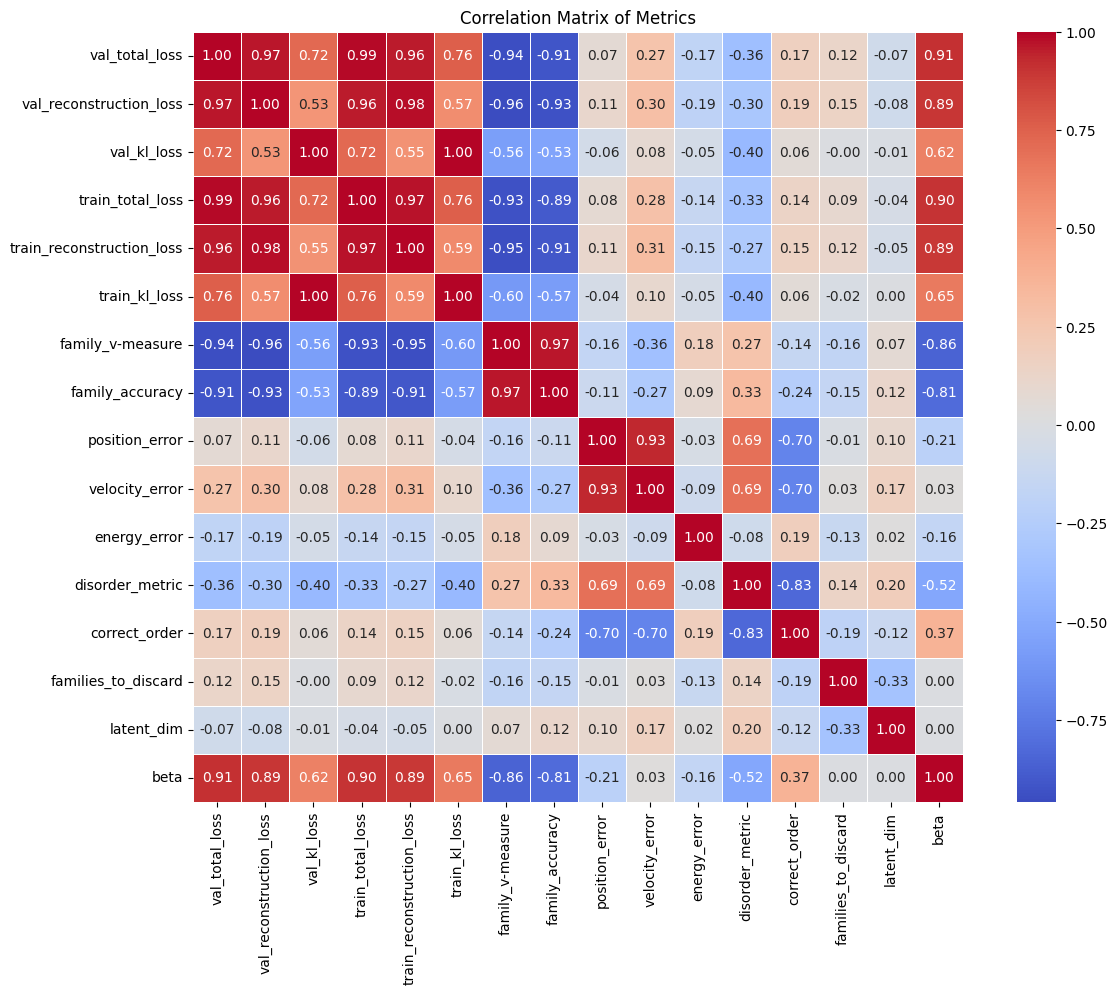

In [44]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns].drop(columns='id').copy()
plot_corr_matrix(df_numeric)

## Parameter Analysis

### Families Discarded

In [45]:
df['families_to_discard'].value_counts()

families_to_discard
0    21
5     7
Name: count, dtype: int64

In [46]:
df.head()

id discarded_family_ids discarded_families  val_total_loss  \
0   1                   []                 []        2.022445   
1   2                   []                 []        3.682778   
2   3                   []                 []        5.691706   
3   4                   []                 []        7.802168   
4   5                   []                 []        4.286800   

   val_reconstruction_loss  val_kl_loss  train_total_loss  \
0                 0.903935     1.118510          2.233856   
1                 1.551744     2.131035          3.878370   
2                 2.088912     3.602796          5.971081   
3                 3.375228     4.426939          8.334735   
4                 4.266716     0.020084          1.313116   

   train_reconstruction_loss  train_kl_loss  family_v-measure  \
0                   1.114132       1.119726          0.812878   
1                   1.736799       2.141573          0.758778   
2                   2.375850       3.595230          0.727170   
3                   3.677602       4.657131          0.679428   
4                   1.276163       0.036952          0.705354   

   family_accuracy  position_error  velocity_error  energy_error  \
0         0.676561        0.254864        0.426664      1.311549   
1         0.568158        0.297370        0.475747      1.270890   
2         0.516224        0.237039        0.417413      0.951022   
3         0.460596        0.221820        0.414658      0.967546   
4         0.438898        0.335772        0.535105      0.942323   

   disorder_metric  correct_order      data_used  families_to_discard  \
0       322.500000      72.186667  EM_N_fix_1500                    0   
1       291.833333      72.710000  EM_N_fix_1500                    0   
2       257.673333      73.090000  EM_N_fix_1500                    0   
3       278.446667      70.570000  EM_N_fix_1500                    0   
4       342.493333      73.076667  EM_N_fix_1500                    0   

        model_name  latent_dim distance_metric   beta  
0  vae_conv5_legit           2       euclidean  0.200  
1  vae_conv5_legit           2       euclidean  0.500  
2  vae_conv5_legit           2       euclidean  1.000  
3  vae_conv5_legit           2       euclidean  1.500  
4  vae_conv5_legit           2       euclidean  0.001

In [47]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from typing import Dict, Any, List
import seaborn as sns

def summarize_and_test(df: pd.DataFrame, group_col: str, features: List[str] = None, visualize: bool = True, figsize: tuple = (10, 40)) -> Dict[str, Any]:
    
    def group_and_summarize(df: pd.DataFrame, group_col: str, features: List[str]) -> Dict[str, Dict[str, Any]]:
        summary_stats = {}
        groups = df[group_col].unique()
        for group in groups:
            group_data = df[df[group_col] == group]
            mean_values = group_data[features].mean()
            std_dev = group_data[features].std()
            summary_stats[group] = {'mean': mean_values, 'std_dev': std_dev}
        return summary_stats

    def perform_anova(df: pd.DataFrame, group_col: str, features: List[str]) -> Dict[str, Dict[str, Any]]:
        anova_results = {}
        for feature in features:
            groups = [group[feature].dropna() for name, group in df.groupby(group_col)]
            f_stat, p_value = stats.f_oneway(*groups)
            anova_results[feature] = {'f_stat': f_stat, 'p_value': p_value}
        return anova_results

    def visualize_summary(summary_stats: dict, anova_results: dict, figsize: tuple):
        groups = list(summary_stats.keys())
        features = list(next(iter(summary_stats.values()))['mean'].index)

        # Generate a color palette
        color_palette = sns.color_palette("husl", n_colors=len(groups))

        fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=figsize)
        if len(features) == 1:
            axes = [axes]
        fig.tight_layout(pad=5.0)

        for i, feature in enumerate(features):
            means = [summary_stats[group]['mean'][feature] for group in groups]
            std_devs = [summary_stats[group]['std_dev'][feature] for group in groups]

            bars = axes[i].bar(groups, means, yerr=std_devs, capsize=5, color=color_palette)
            
            p_value = anova_results[feature]['p_value']
            significance = '*' if p_value < 0.05 else 'ns'
            axes[i].set_title(f'{feature} (p={p_value:.3f}, {significance})')
            axes[i].set_ylabel('Value')
            axes[i].set_ylim(0, max(means) + 1.5 * max(std_devs))

            # Add mean values on top of each bar
            for bar in bars:
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height,
                            f'{height:.2f}',
                            ha='center', va='bottom')

        plt.xlabel('Groups')
        plt.show()

    # If features are not specified, use all columns except the grouping column
    if features is None:
        features = [col for col in df.columns if col != group_col]

    # Ensure all specified features exist in the DataFrame
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        raise KeyError(f"The following features are not in the DataFrame: {missing_features}")

    summary_stats = group_and_summarize(df, group_col, features)
    anova_results = perform_anova(df, group_col, features)
    
    if visualize:
        visualize_summary(summary_stats, anova_results, figsize)
    
    return {
        'summary_stats': summary_stats,
        'anova_results': anova_results
    }

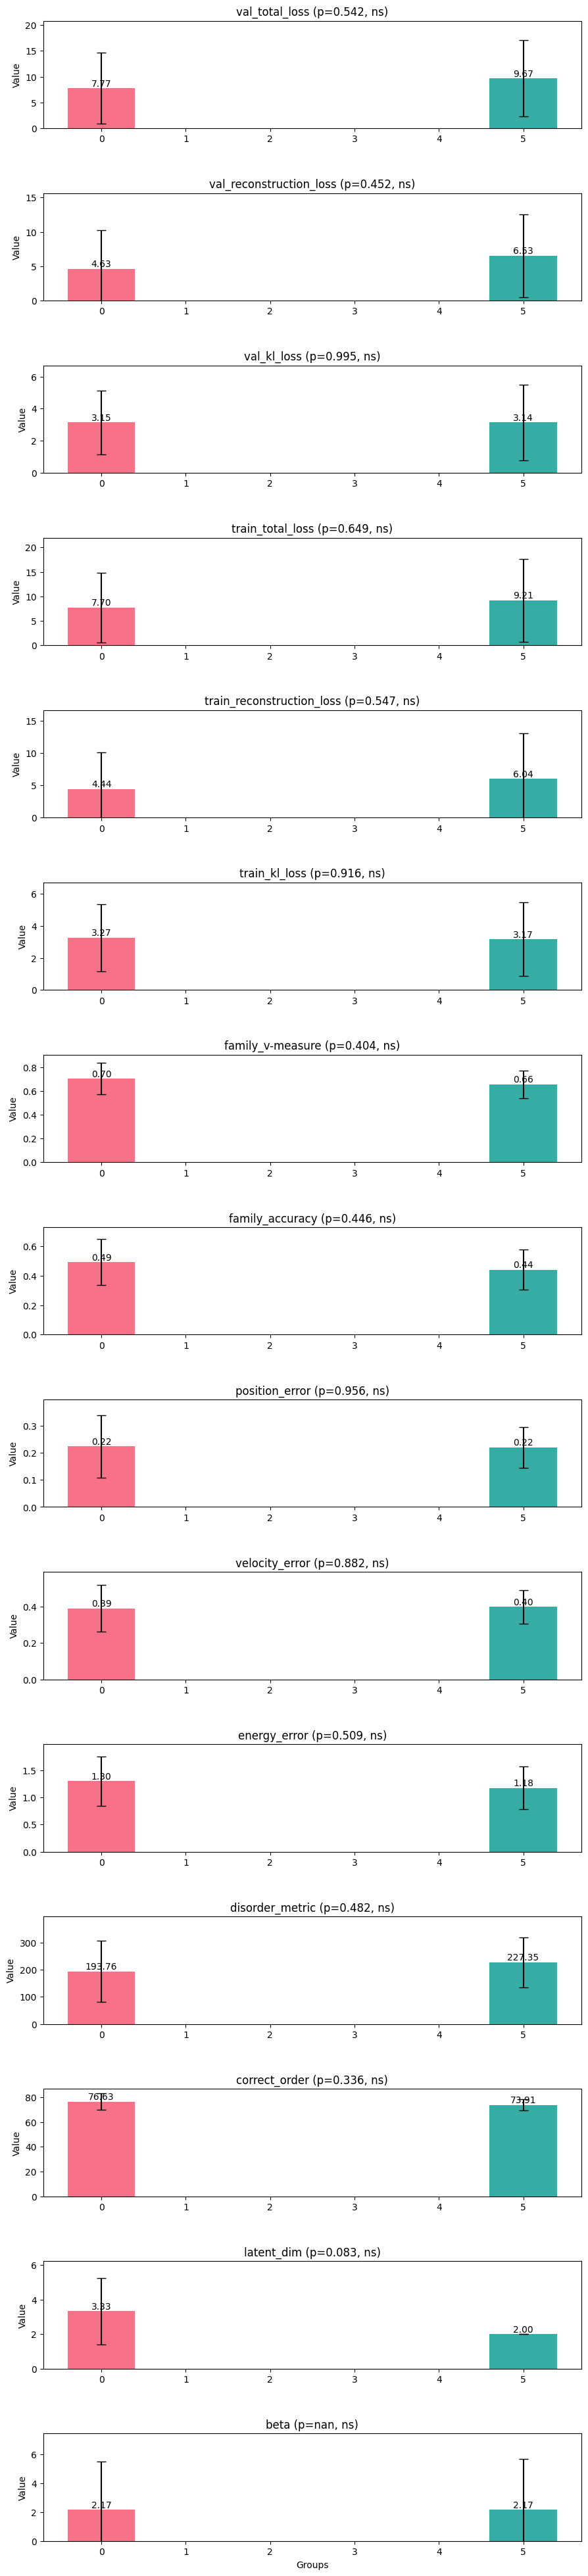

In [48]:
df_numeric['latent_dim'] = df['latent_dim'].values
results=summarize_and_test(df_numeric, 'families_to_discard')
df_numeric = df_numeric.drop(columns='families_to_discard')

### Model

In [49]:
models =df['model_name']
models.value_counts()

model_name
vae_conv5_legit          21
inception_time_wp_vae     7
Name: count, dtype: int64

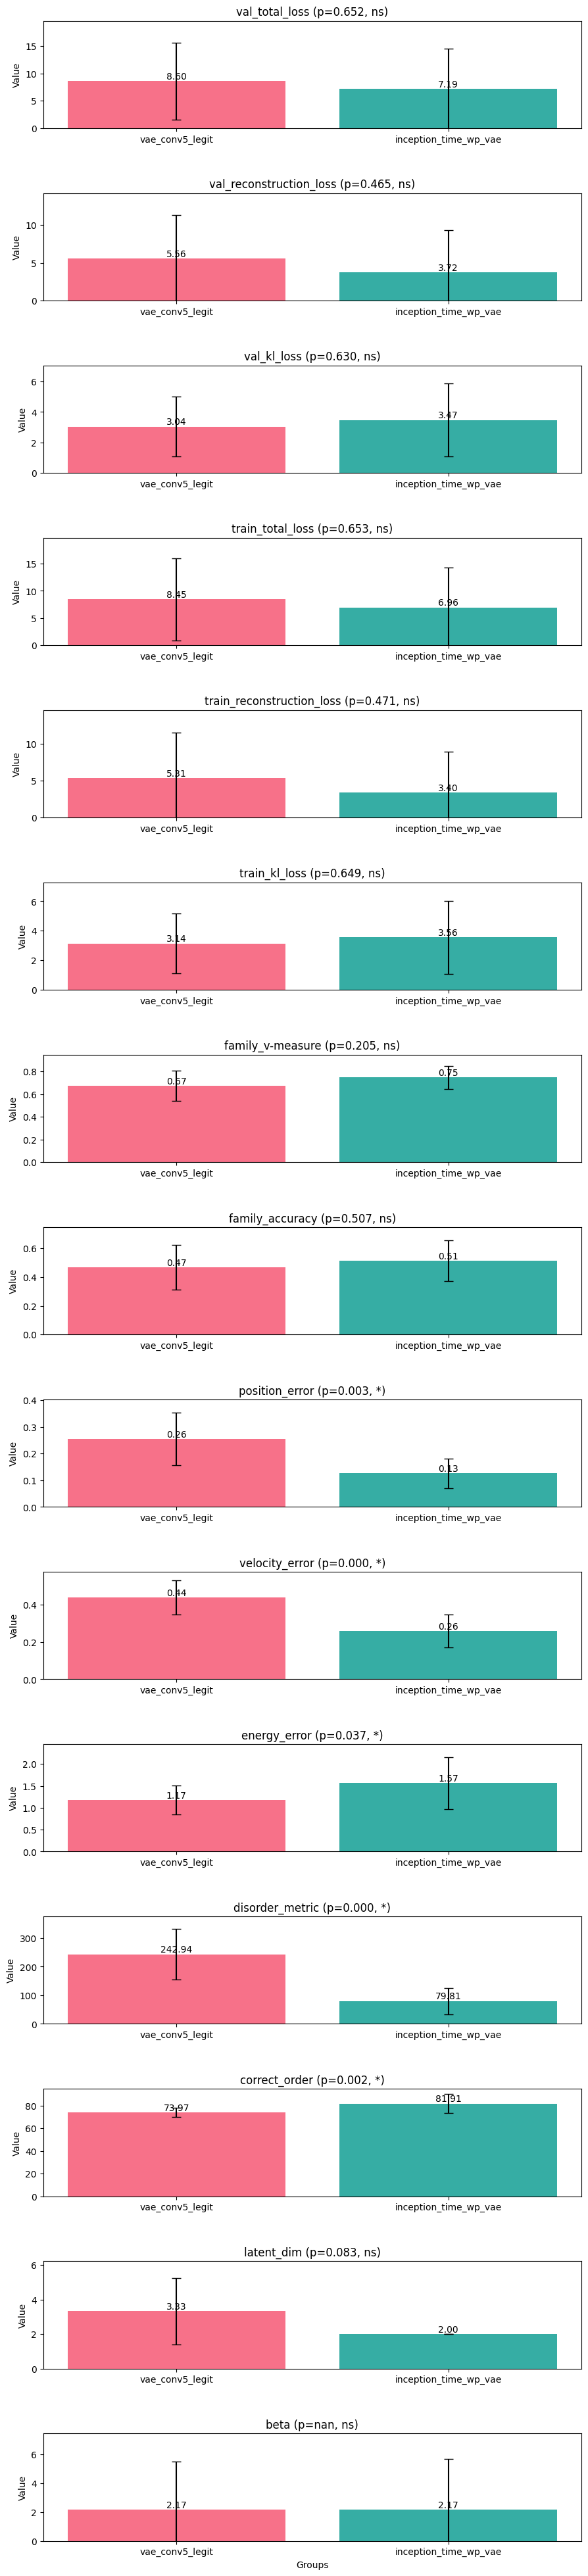

In [50]:
df_numeric['model_name'] = df['model_name'].values
results=summarize_and_test(df_numeric, 'model_name')
df_numeric = df_numeric.drop(columns='model_name')

### Latent Dimensions

In [51]:
models =df['latent_dim']
models.value_counts()

latent_dim
2    21
6     7
Name: count, dtype: int64

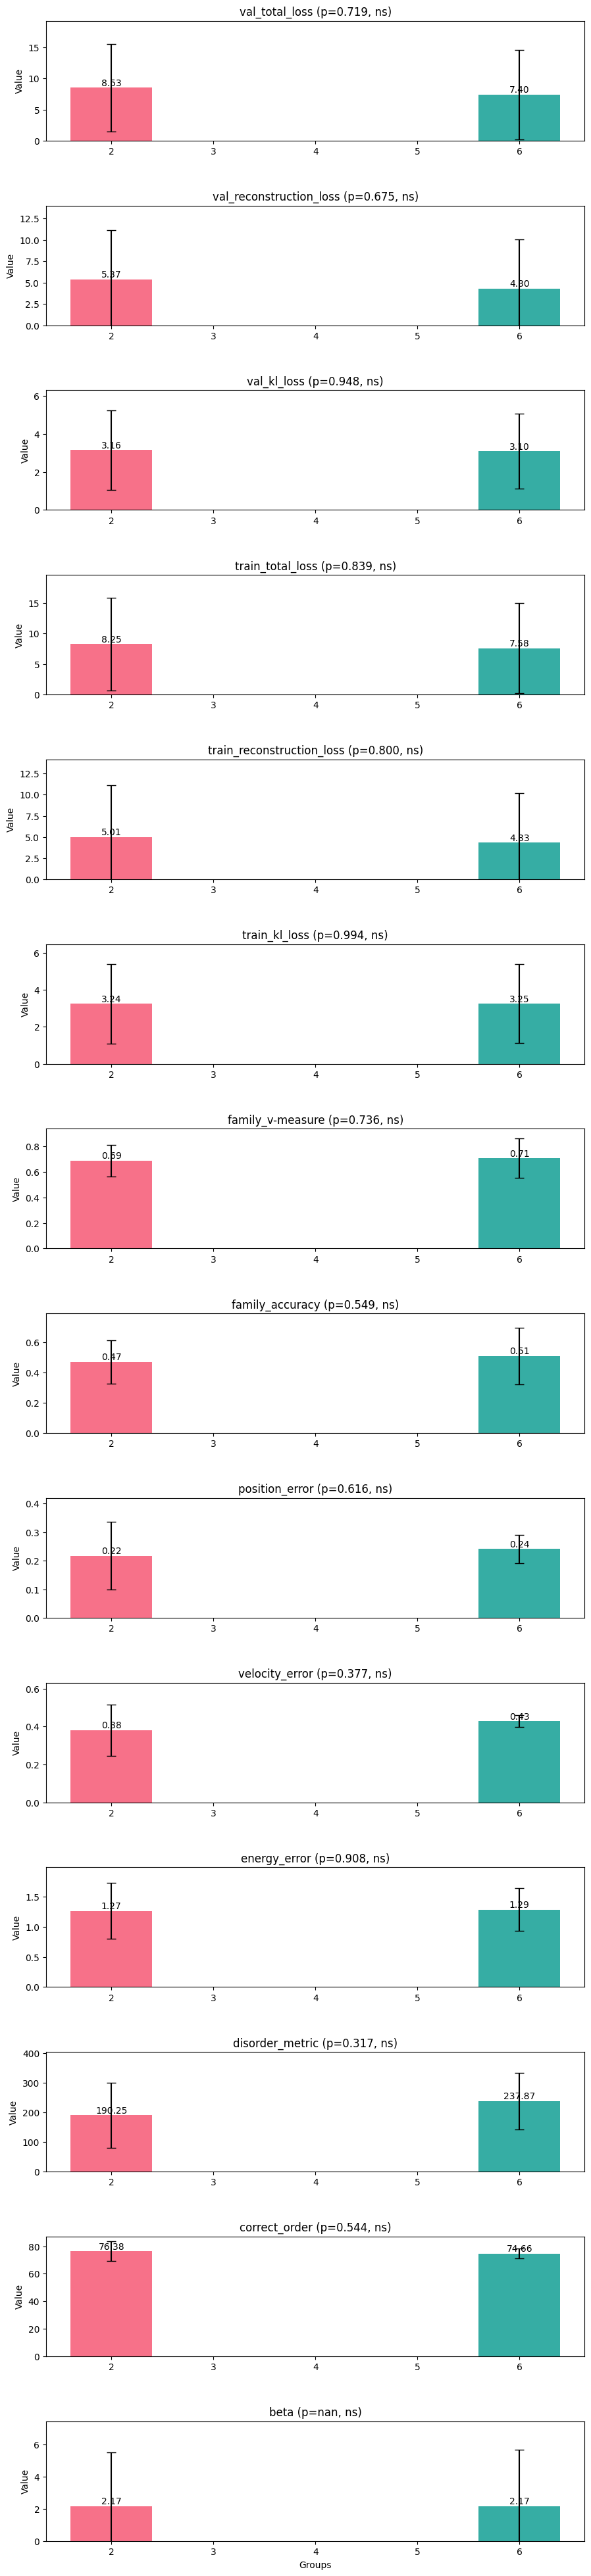

In [52]:
df_numeric['latent_dim'] = df['latent_dim'].values
results=summarize_and_test(df_numeric, 'latent_dim')
df_numeric = df_numeric.drop(columns='latent_dim')

### Beta

In [53]:
models =df['beta']
models.value_counts()

beta
0.200     4
0.500     4
1.000     4
1.500     4
0.001     4
2.000     4
10.000    4
Name: count, dtype: int64

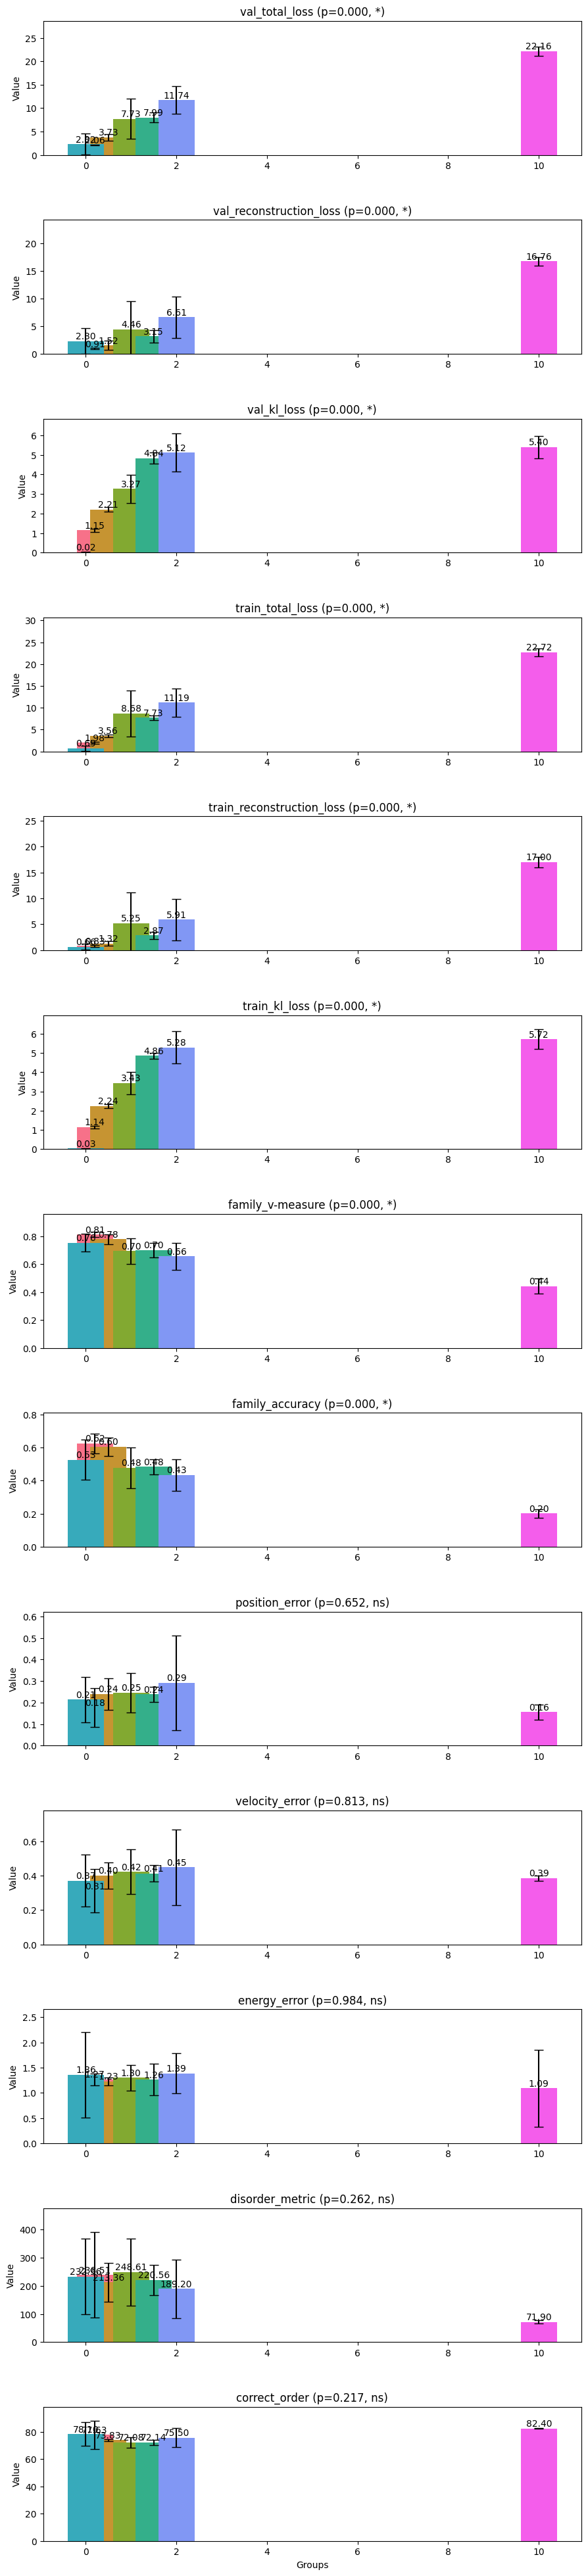

In [54]:
results=summarize_and_test(df_numeric, 'beta')

# Orbit Metrics

In [ ]:
import os
import pandas as pd
import re

def concatenate_csvs_from_experiment_folder(experiments_folder, file_suffix):
    dataframes = []
    
    for folder in os.listdir(experiments_folder):
        if folder.startswith('experiment_') and os.path.isdir(os.path.join(experiments_folder, folder)):
            # Extract the experiment number using regex
            match = re.search(r'experiment_(\d+)', folder)
            if match:
                experiment_id = match.group(1)
                csv_file_path = os.path.join(experiments_folder, folder, f'exp{experiment_id}_{file_suffix}.csv')
                
                if os.path.isfile(csv_file_path):
                    # Load the CSV file into a DataFrame
                    df = pd.read_csv(csv_file_path)
                    
                    # Add a column to identify the experiment
                    df['experiment_id'] = experiment_id
                    
                    dataframes.append(df)
    
    # Concatenate all DataFrames along rows
    if dataframes:
        return pd.concat(dataframes, axis=0, ignore_index=True)
    else:
        return pd.DataFrame()

In [56]:
generation_df = concatenate_csvs_from_experiment_folder(experiments_folder,'generation_df')
generation_df.shape

(3600, 10)

In [57]:
generation_df['experiment_id'].value_counts()

experiment_id
20    300
19    300
5     300
2     300
9     300
7     300
11    300
16    300
17    300
8     300
6     300
14    300
Name: count, dtype: int64

In [58]:
generation_df.head()

position_error  velocity_error  energy_error  disorder_metric  \
0        0.039023        0.145125      0.598114              8.0   
1        0.050340        0.098792      0.208008             38.0   
2        0.016583        0.053681      0.055795             60.0   
3        0.084174        0.102080      0.721510             12.0   
4        0.059803        0.095766      0.137650             30.0   

   correct_order  inversions  kendall_tau_distance  nearest_orbit  \
0           95.0         4.0              0.001618          41654   
1           85.0        19.0              0.007686          24821   
2           76.0        31.0              0.012551          11599   
3           93.0         7.0              0.002832          35734   
4           88.0        16.0              0.006472          30829   

   nearest_orbit_distance experiment_id  
0                2.451330            20  
1                4.793100            20  
2                1.715715            20  
3                2.075617            20  
4                3.383785            20

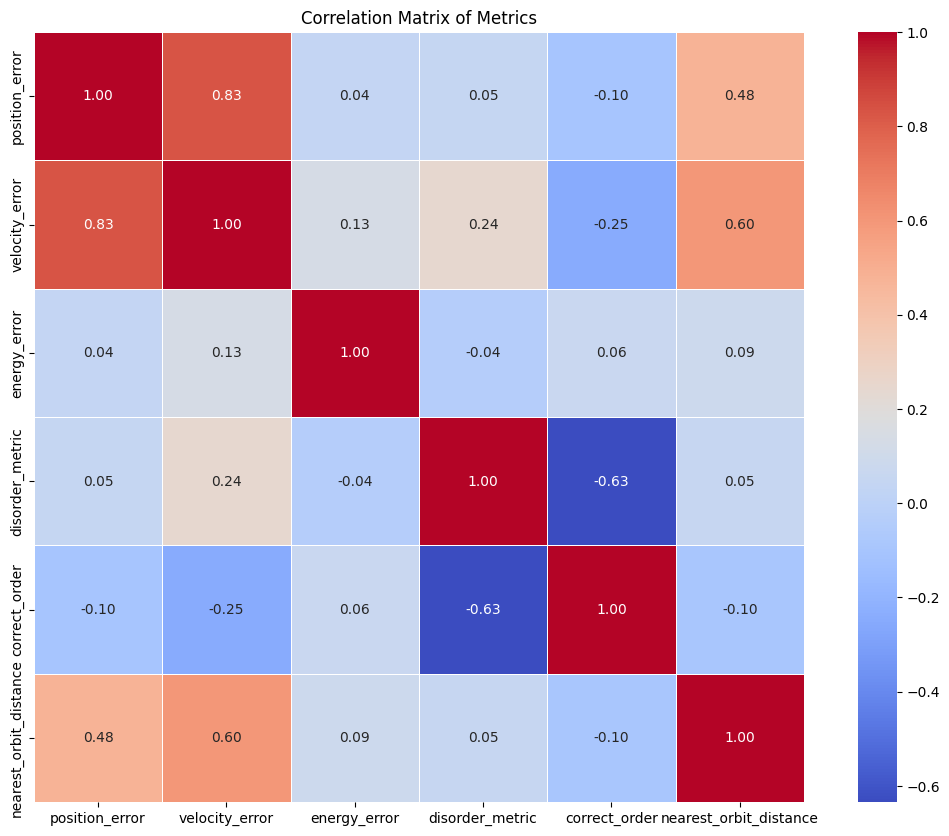

In [59]:
columns_to_drop_generation = ['experiment_id','nearest_orbit', 'inversions', 'kendall_tau_distance']
plot_corr_matrix(generation_df.drop(columns=columns_to_drop_generation))

In [60]:
refined_orbits_df = concatenate_csvs_from_experiment_folder(experiments_folder,'refined_orbits_df')
refined_orbits_df.shape

(1661, 44)

In [61]:
refined_orbits_df = refined_orbits_df.dropna(axis=0)
refined_orbits_df.shape

(1661, 44)

In [62]:
refined_orbits_df.head()

id  old_period     period  iterations_convergence         error  \
0   0   11.703933  12.357871                      10  7.152633e-10   
1   1    5.347148   6.289978                       8  1.124118e-10   
2   4    6.501299   6.299366                      13  3.299068e-11   
3   7    6.185820   4.888628                       9  8.322698e-13   
4  10   11.237919  12.363278                      23  1.168893e-10   

   initial_pos_x0  initial_pos_y0  initial_pos_z0  initial_vel_x0  \
0        0.591470        0.031069       -0.098176        0.036233   
1        0.694371        0.410032        0.255259       -0.298289   
2        0.679246       -0.410412        0.280681        0.089587   
3        0.777826       -0.053229       -0.076891        0.016727   
4        0.977119       -0.095046       -0.096719        0.046247   

   initial_vel_y0  initial_vel_z0  final_pos_x0  final_pos_y0  final_pos_z0  \
0        1.000544       -0.013237      0.521137     -0.040531 -1.504163e-13   
1       -0.090342        0.725189      0.521621      0.462451  3.546220e-01   
2       -0.650120       -0.884761      0.698879     -0.597143  3.776740e-01   
3        1.582441       -0.038132      0.697347      0.016547  1.372986e-14   
4        1.118948       -0.060200      0.741859     -1.145952 -1.021998e-11   

   final_vel_x0  final_vel_y0  final_vel_z0  disorder_metric  correct_order  \
0      0.032831      1.023015  4.429204e-13             10.0           94.0   
1     -0.342943     -0.267807  8.936788e-01             22.0           89.0   
2     -0.101020     -0.659098 -8.642169e-01             38.0           85.0   
3      0.006547      0.698449 -2.527150e-13            246.0           61.0   
4     -0.528460     -0.056959  4.988532e-12            192.0           88.0   

   inversions  kendall_tau_distance  propagated_position_error  \
0         5.0              0.002020               1.243014e-11   
1        11.0              0.004444               2.853391e-12   
2        21.0              0.008485               1.426399e-12   
3       172.0              0.069495               2.064911e-12   
4       121.0              0.048889               7.737612e-12   

   propagated_velocity_error  propagated_energy_error  \
0               3.025524e-11             1.177680e-10   
1               7.224060e-12             4.038831e-11   
2               2.809536e-12             2.433970e-12   
3               3.897801e-12             1.895723e-13   
4               6.485309e-12             4.431840e-12   

   latent_distance_to_generation  calculated_jacobi  \
0                       0.013258           2.983566   
1                       0.108415           2.042545   
2                       0.095870           1.668356   
3                       0.296321           2.878101   
4                       0.149730           3.054045   

   period_distance_with_generation  feature_closest_orbit  \
0                         0.653938                  41642   
1                         0.942830                  24799   
2                         0.201933                  30932   
3                         1.297193                  28498   
4                         1.125359                  41647   

   feature_distance_from_closest_orbit  nearest_orbit  nearest_orbit_distance  \
0                             0.000896          41647                1.567599   
1                             0.000527          24836                4.199245   
2                             0.001194          30846                3.349759   
3                             0.004067           5399                1.800536   
4                             0.069585          35773                9.075386   

   distance_from_generation  centroid_distance  feature_centroid_distance  \
0                  2.387848           0.841099                   5.137357   
1                  2.950673           1.525647                   1.028908   
2                  2.637535           2.045666               

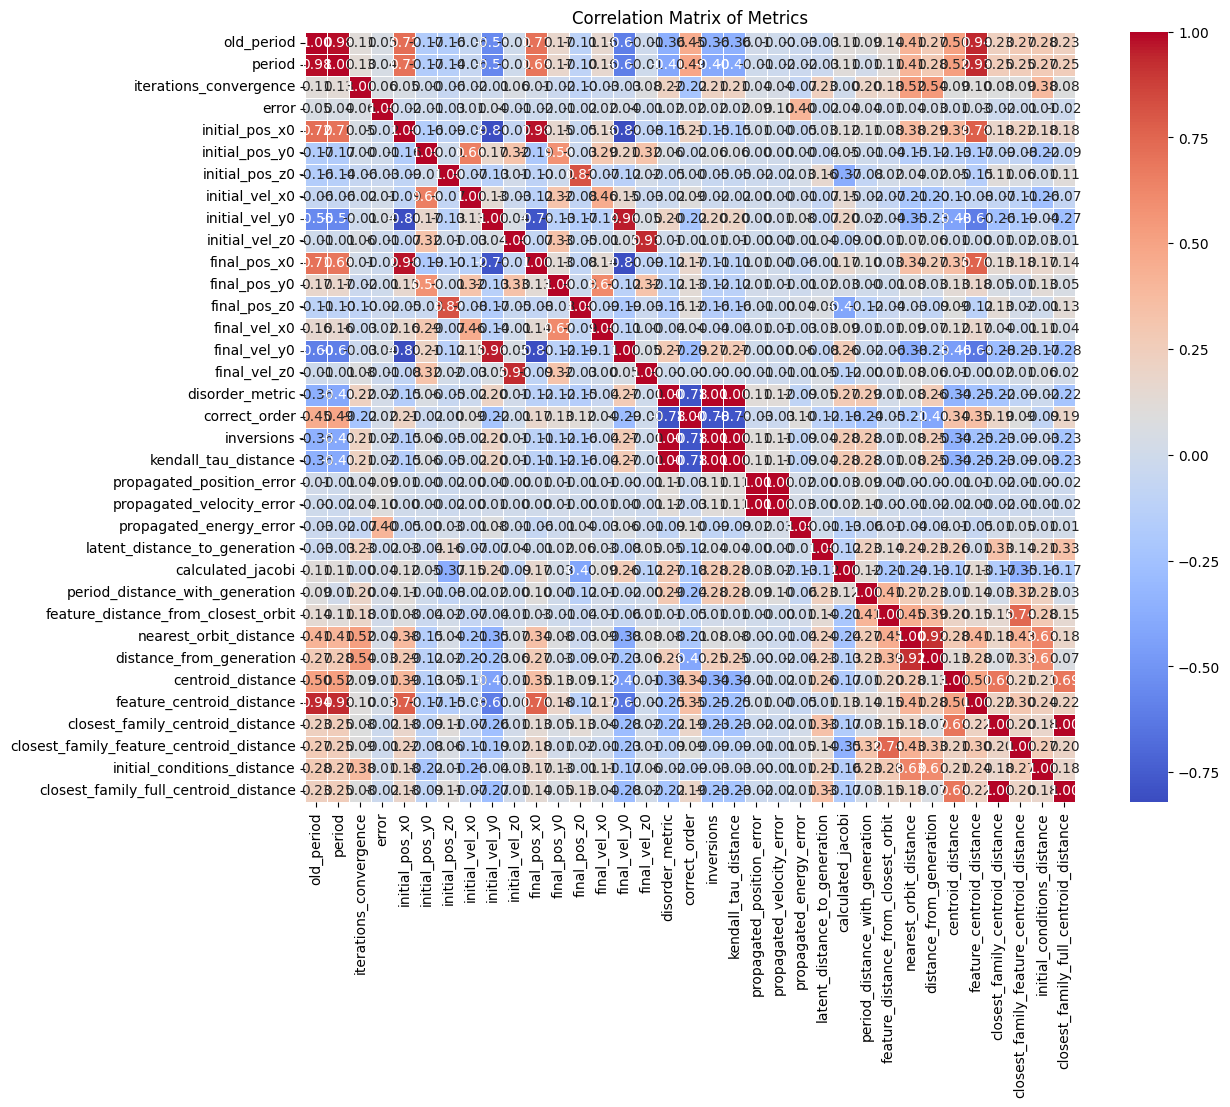

In [63]:
not_to_show_columns = ['id', 'experiment_id','nearest_orbit', 'feature_closest_orbit', 'nearest_orbit', 'closest_family_centroid', 'closest_family_feature_centroid', 'closest_family_full_centroid', 'family_of_feature_closest_orbit', 'family_of_closest_orbit']
plot_corr_matrix(refined_orbits_df.drop(columns=not_to_show_columns))

## Study Parameters

In [64]:
refined_orbits_df['experiment_id'] = refined_orbits_df['experiment_id'].astype(int)
refined_orbits_df = refined_orbits_df.merge(df.drop(columns=['disorder_metric', 'correct_order']), left_on='experiment_id', right_on='id', how='left')

In [65]:
refined_orbits_df.head()

id_x  old_period     period  iterations_convergence         error  \
0     0   11.703933  12.357871                      10  7.152633e-10   
1     1    5.347148   6.289978                       8  1.124118e-10   
2     4    6.501299   6.299366                      13  3.299068e-11   
3     7    6.185820   4.888628                       9  8.322698e-13   
4    10   11.237919  12.363278                      23  1.168893e-10   

   initial_pos_x0  initial_pos_y0  initial_pos_z0  initial_vel_x0  \
0        0.591470        0.031069       -0.098176        0.036233   
1        0.694371        0.410032        0.255259       -0.298289   
2        0.679246       -0.410412        0.280681        0.089587   
3        0.777826       -0.053229       -0.076891        0.016727   
4        0.977119       -0.095046       -0.096719        0.046247   

   initial_vel_y0  initial_vel_z0  final_pos_x0  final_pos_y0  final_pos_z0  \
0        1.000544       -0.013237      0.521137     -0.040531 -1.504163e-13   
1       -0.090342        0.725189      0.521621      0.462451  3.546220e-01   
2       -0.650120       -0.884761      0.698879     -0.597143  3.776740e-01   
3        1.582441       -0.038132      0.697347      0.016547  1.372986e-14   
4        1.118948       -0.060200      0.741859     -1.145952 -1.021998e-11   

   final_vel_x0  final_vel_y0  final_vel_z0  disorder_metric  correct_order  \
0      0.032831      1.023015  4.429204e-13             10.0           94.0   
1     -0.342943     -0.267807  8.936788e-01             22.0           89.0   
2     -0.101020     -0.659098 -8.642169e-01             38.0           85.0   
3      0.006547      0.698449 -2.527150e-13            246.0           61.0   
4     -0.528460     -0.056959  4.988532e-12            192.0           88.0   

   inversions  kendall_tau_distance  propagated_position_error  \
0         5.0              0.002020               1.243014e-11   
1        11.0              0.004444               2.853391e-12   
2        21.0              0.008485               1.426399e-12   
3       172.0              0.069495               2.064911e-12   
4       121.0              0.048889               7.737612e-12   

   propagated_velocity_error  propagated_energy_error  \
0               3.025524e-11             1.177680e-10   
1               7.224060e-12             4.038831e-11   
2               2.809536e-12             2.433970e-12   
3               3.897801e-12             1.895723e-13   
4               6.485309e-12             4.431840e-12   

   latent_distance_to_generation  calculated_jacobi  \
0                       0.013258           2.983566   
1                       0.108415           2.042545   
2                       0.095870           1.668356   
3                       0.296321           2.878101   
4                       0.149730           3.054045   

   period_distance_with_generation  feature_closest_orbit  \
0                         0.653938                  41642   
1                         0.942830                  24799   
2                         0.201933                  30932   
3                         1.297193                  28498   
4                         1.125359                  41647   

   feature_distance_from_closest_orbit  nearest_orbit  nearest_orbit_distance  \
0                             0.000896          41647                1.567599   
1                             0.000527          24836                4.199245   
2                             0.001194          30846                3.349759   
3                             0.004067           5399                1.800536   
4                             0.069585          35773                9.075386   

   distance_from_generation  centroid_distance  feature_centroid_distance  \
0                  2.387848           0.841099                   5.137357   
1                  2.950673           1.525647                   1.028908   
2                  2.637535           2.045666   

In [66]:
non_meaning_numeric_columns = ['id_x', 'id_y', 'experiment_id','nearest_orbit', 'feature_closest_orbit', 'nearest_orbit', 'closest_family_centroid', 'closest_family_feature_centroid', 'closest_family_full_centroid', 'family_of_feature_closest_orbit', 'family_of_closest_orbit']
ref_df = refined_orbits_df.drop(columns=non_meaning_numeric_columns)
numeric_columns_ref = ref_df.select_dtypes(include=[np.number]).columns
parameter_columns = ['beta','latent_dim', 'families_to_discard']
ref_df_numeric = ref_df[numeric_columns_ref].drop(columns=parameter_columns).copy()

### Model Architercture

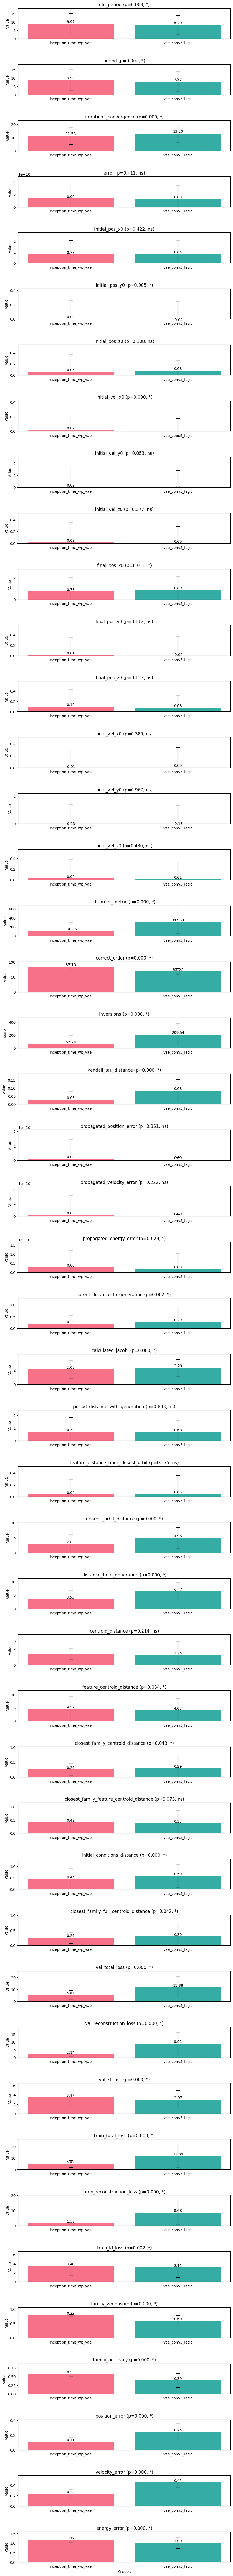

In [67]:
ref_df_numeric['model_name'] = ref_df['model_name']
results=summarize_and_test(ref_df_numeric, 'model_name', figsize=(10,100))
ref_df_numeric.drop(columns='model_name', inplace=True)

### Number of Families Discarded

In [68]:
ref_df['families_to_discard'].value_counts()

families_to_discard
0    1661
Name: count, dtype: int64

In [69]:
"""
ref_df_numeric['families_to_discard'] = ref_df['families_to_discard']
results=summarize_and_test(ref_df_numeric, 'families_to_discard', figsize=(10,100))
ref_df_numeric.drop(columns='families_to_discard', inplace=True)
"""

"\nref_df_numeric['families_to_discard'] = ref_df['families_to_discard']\nresults=summarize_and_test(ref_df_numeric, 'families_to_discard', figsize=(10,100))\nref_df_numeric.drop(columns='families_to_discard', inplace=True)\n"

### Latent Dimensions

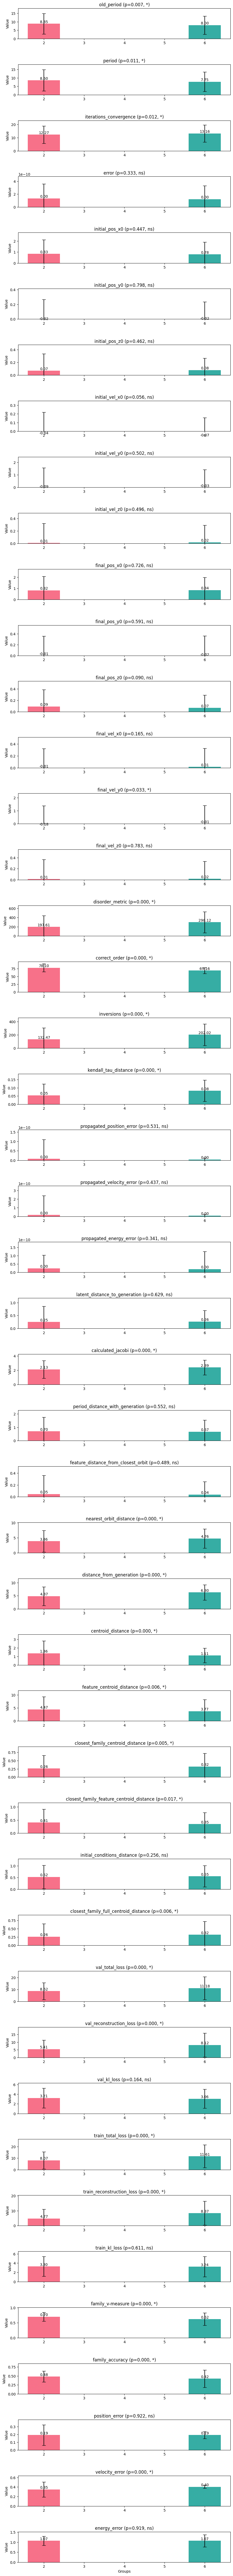

In [70]:
ref_df_numeric['latent_dim'] = ref_df['latent_dim']
results=summarize_and_test(ref_df_numeric, 'latent_dim', figsize=(10,100))
ref_df_numeric.drop(columns='latent_dim', inplace=True)

### Beta

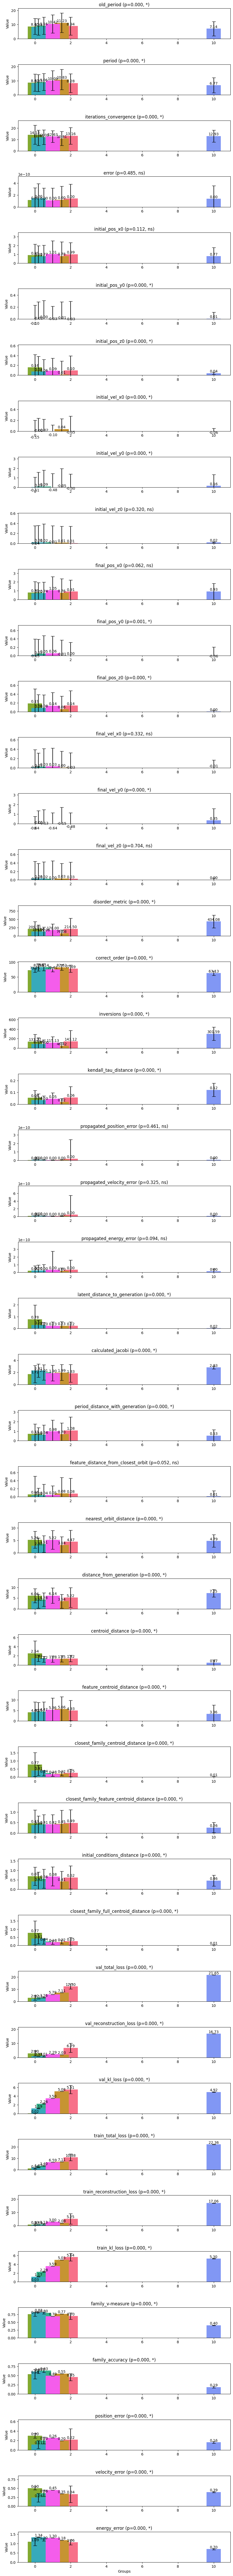

In [71]:
ref_df_numeric['beta'] = ref_df['beta']
results=summarize_and_test(ref_df_numeric, 'beta', figsize=(10,100))
ref_df_numeric.drop(columns='beta', inplace=True)

# Plots

## Generated Orbits

In [72]:
# create_experiment_image_grid(experiments_folder, 'all_generated_data.png', font_size=100, crop_length=100, save_path=generated_orbits_path)